# Impact of age of enrollment on the Five Domains of Speech-Language in Children with Hearing Loss at age 4 years

Paper 2

In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(context='notebook', style='ticks')

Import data

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.head()

,redcap_event_name,academic_year_rv,hl,male,_race,prim_lang,sib,_mother_ed,father_ed,par1_ed,...,gf3_sis_ss,gf3_siw_ss,gf_version,ppvt_f,ppvt_ss,rowpvt_ss,school,score,test_name,test_type
0,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,58.0,NaN,EOWPVT
1,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,51.0,PLS,receptive
2,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,101,60.0,PLS,expressive
3,initial_assessment_arm_1,2014.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,626,89.0,PLS,receptive
4,initial_assessment_arm_1,2014.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,626,88.0,PLS,expressive


Indicator for non-profound hearing loss

In [4]:
lsl_dr['deg_hl_below6'] = lsl_dr.degree_hl<6
lsl_dr.loc[lsl_dr.degree_hl.isnull(), 'deg_hl_below6'] = np.nan

Indicator for first intervention outside OPTION

In [5]:
lsl_dr['int_outside_option'] = lsl_dr.age > lsl_dr.age_int
lsl_dr.loc[lsl_dr.age < lsl_dr.age_int, 'int_outside_option'] = np.nan

Indicator for high school graduation of mother

In [6]:
lsl_dr['mother_hs'] = lsl_dr.mother_ed > 1
lsl_dr.loc[lsl_dr.mother_ed.isnull(), 'mother_hs'] = None

Create age in years variable

In [7]:
lsl_dr['age_years'] = lsl_dr.age/12.

Create school index

In [8]:
schools_unique = np.sort(lsl_dr.school.unique())
school_lookup = dict(zip(schools_unique, range(len(schools_unique))))

In [9]:
lsl_dr['school_idx'] = lsl_dr.school.replace(school_lookup)

Create student index

In [10]:
student_unique = np.sort(lsl_dr.study_id.unique())
student_lookup = dict(zip(student_unique, range(len(student_unique))))

In [11]:
lsl_dr['student_idx'] = lsl_dr.study_id.replace(student_lookup)

### Exclusions

Drop non-english and other disabilities, filter for hearing loss

In [12]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [13]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & ~lsl_dr.synd_or_disab.astype(bool) 
                  & (lsl_dr.degree_hl!=0)
                  & ((lsl_dr.etiology_2==0)
                  | (lsl_dr.etiology_2.isnull() & ~other_etiology)))

In [14]:
covariates = ['score', 'student_idx', 'school_idx', 'male', 'sib', 'family_inv', 'race', 'age_test', 
              'domain', 'deg_hl_below6', 'mother_hs', 'age_years', 'test_type', 'time', 'bilateral_ci',
              'bilateral_ha', 'unilateral_ci', 'unilateral_ha', 'bimodal']

In [15]:
analysis_subset = lsl_dr.loc[inclusion_mask, covariates].copy().dropna(subset=['time'])
analysis_subset.shape

(8112, 19)

In [37]:
analysis_subset[['bilateral_ci',
              'bilateral_ha', 'unilateral_ci', 'unilateral_ha', 'bimodal']].mean()

bilateral_ci     0.635315
bilateral_ha     0.219673
unilateral_ci    0.092914
unilateral_ha    0.102421
bimodal          0.072633
dtype: float64

## Summary Statistics

In [17]:
unique_students = analysis_subset.drop_duplicates(subset='student_idx')
unique_students.shape

(999, 19)

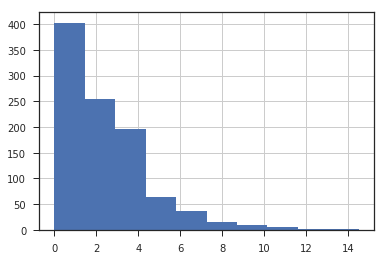

In [18]:
unique_students.age_years.hist()

In [19]:
unique_students.male.mean()

0.48848848848848847

In [20]:
unique_students.domain.value_counts()

Articulation             457
Language                 345
Expressive Vocabulary    190
Receptive Vocabulary       7
Name: domain, dtype: int64

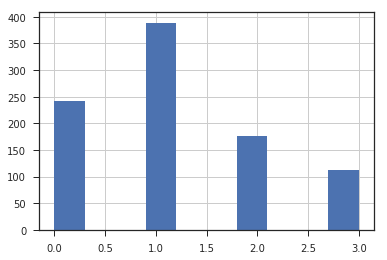

In [21]:
unique_students.sib.hist()

In [22]:
unique_students.deg_hl_below6.mean()

0.5665188470066519

In [23]:
unique_students.mother_hs.mean()

0.5523672883787661

Add expressive and receptive to langauge test domains

In [24]:
analysis_subset.loc[(analysis_subset.domain=='Language') & (analysis_subset.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
analysis_subset.loc[(analysis_subset.domain=='Language') & (analysis_subset.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

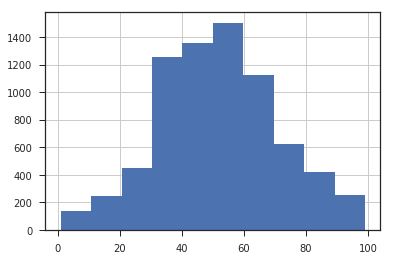

In [25]:
analysis_subset[analysis_subset.age_test<100].age_test.hist()

In [26]:
(analysis_subset.isnull().sum() / analysis_subset.shape[0]).round(2)

score            0.00
student_idx      0.00
school_idx       0.00
male             0.00
sib              0.06
family_inv       0.16
race             0.02
age_test         0.00
domain           0.00
deg_hl_below6    0.07
mother_hs        0.28
age_years        0.00
test_type        0.00
time             0.00
bilateral_ci     0.00
bilateral_ha     0.00
unilateral_ci    0.00
unilateral_ha    0.00
bimodal          0.00
dtype: float64

Drop records with missing race and age at ernollment, since there is less than 1% of them

In [27]:
analysis_subset = analysis_subset.dropna(subset=['race', 'age_years'])

In [28]:
analysis_subset.race.value_counts()

0.0    5167
1.0     973
2.0     740
4.0     706
3.0     303
Name: race, dtype: int64

## Receptive Language Test Score Model

In [29]:
receptive_language_dataset = analysis_subset[(analysis_subset.domain=='Receptive Language')]

receptive_language_dataset.head()

,score,student_idx,school_idx,male,sib,family_inv,race,age_test,domain,deg_hl_below6,mother_hs,age_years,test_type,time,bilateral_ci,bilateral_ha,unilateral_ci,unilateral_ha,bimodal
46,81.0,2991,25,1.0,3.0,0.0,0.0,44.0,Receptive Language,1.0,1.0,3.666667,receptive,0.0,False,True,False,False,False
295,85.0,3037,27,1.0,1.0,2.0,0.0,63.0,Receptive Language,1.0,NaN,0.250000,receptive,4.0,False,True,False,False,False
464,102.0,2723,24,1.0,0.0,1.0,4.0,8.0,Receptive Language,1.0,NaN,0.000000,receptive,0.0,False,False,False,True,False
561,85.0,2616,24,1.0,0.0,1.0,0.0,50.0,Receptive Language,1.0,0.0,2.000000,receptive,2.0,False,False,False,True,False
680,107.0,2844,24,1.0,1.0,0.0,4.0,21.0,Receptive Language,1.0,1.0,0.666667,receptive,0.0,False,False,False,True,False


This is the size of the resulting dataset to be used in this analysis

In [30]:
receptive_language_dataset.shape

(1667, 19)

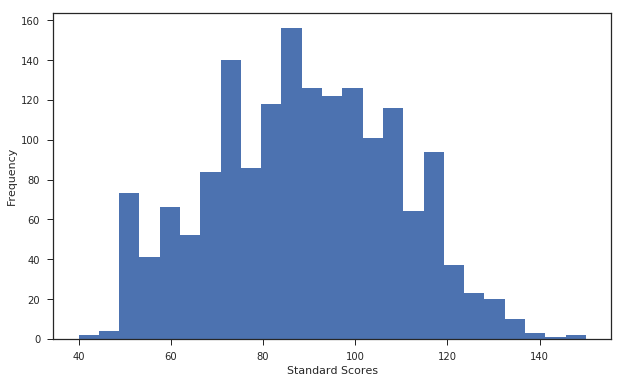

In [31]:
receptive_language_dataset.score.hist(grid=False, bins=25, figsize=(10, 6))
plt.xlabel('Standard Scores'); plt.ylabel('Frequency');

Final analysis dataset size

In [32]:
receptive_language_dataset.shape

(1667, 19)

In [33]:
receptive_language_dataset.race.value_counts()

0.0    1088
1.0     239
2.0     159
4.0     120
3.0      61
Name: race, dtype: int64

In [34]:
def fillna(x, value):
    x_masked = np.ma.masked_invalid(x)
    np.ma.set_fill_value(x_masked, value)
    return x_masked

fillna(np.array([0.4, np.nan, 5]), 0.5)

masked_array(data=[0.4, --, 5.0],
             mask=[False,  True, False],
       fill_value=0.5)

In [40]:
from pymc3 import Bernoulli, Normal, Uniform, Dirichlet, Categorical, Beta, HalfCauchy, Exponential, Multinomial
from pymc3 import Model, Deterministic, Metropolis
from numpy.ma import masked_values, set_fill_value, masked_invalid
import theano.tensor as tt
from theano import shared

def generate_model(dataset, cohort_age):
    
    if cohort_age==2:
        mask = (dataset.age_test>=24) & (dataset.age_test<36)
    elif cohort_age==3:
        mask = (dataset.age_test>=36) & (dataset.age_test<48)
    elif cohort_age==4:
        mask = (dataset.age_test>=48) & (dataset.age_test<60)
    elif cohort_age==5:
        mask = (dataset.age_test>=60) & (dataset.age_test<72)
    elif cohort_age==6:
        mask = (dataset.age_test>=72) & (dataset.age_test<84)
    else:
        print('Invalid age!')
        return
    
    # Generate mean scores
    mean_scores = dataset[mask].groupby('student_idx').score.mean()
    dataset_unique = dataset[mask].drop_duplicates(subset='student_idx')
    dataset_unique.set_index('student_idx').drop('score', axis=1).join(mean_scores)
    assert not dataset_unique.score.isnull().sum()
    
    (male, sib, family_inv, race, school, time, 
             non_severe, mom_hs, age_enroll, score) = dataset_unique[['male', 'sib','family_inv', 'race', 'school_idx',
                                                    'time', 'deg_hl_below6', 'mother_hs', 
                                                    'age_years', 'score']].astype(float).T.values

    # Transform some data
    age_enroll_std = age_enroll - age_enroll.mean()

    with Model() as model:

        # Imputation of family involvement
        if np.isnan(family_inv).sum():
            p_family_inv = Dirichlet("p_family_inv", np.ones(5))
            x_family_inv = Categorical('x_family_inv', p_family_inv, 
                                       observed=masked_invalid(family_inv))
        else:
            x_family_inv = family_inv
        
        # Imputation of hearing loss
        if np.isnan(non_severe).sum():
            p_hl = Beta("p_hl", 1, 1, testval=0.9)
            x_hl = Bernoulli('x_hl', p_hl, observed=masked_invalid(non_severe))
        else:
            x_hl = non_severe
            
        # Imputation of maternal education
        if np.isnan(mom_hs).sum():
            p_mother_hs = Beta("p_mother_hs", 1, 1)
            x_mother_hs = Bernoulli('x_mother_hs', p_mother_hs, 
                                    observed=masked_values(fillna(mom_hs, 0.5), value=0.5))
        else:
            x_mother_hs = mom_hs

        # Imputation of siblings
        if np.isnan(sib).sum():
            n_sib_cats = len(dataset.sib.unique())
            p_sib = Dirichlet("p_sib", np.ones(n_sib_cats))
            x_sib = Categorical('x_sib', p_sib, observed=masked_values(fillna(sib, 0.5), value=0.5))
        else:
            x_sib = sib
            
        # Indices to school random effects
        unique_schools = np.unique(school)
        school_index = [list(unique_schools).index(s) for s in school]

        # School random effect
        μ_school = Normal('μ_school', 90, sd=10)
        σ_school = Exponential("σ_school", 1)
        z_school = Normal('z_school', mu=0, sd=1, shape=len(unique_schools))
        α_school = Deterministic("α_school", μ_school + z_school*σ_school)
        
        # Random intercepts
        intercept = α_school[school_index]
        
        # Race effect
        β_race = Normal("β_race", 0, sd=10, shape=4)
        race_effect = tt.concatenate([[0], β_race])[race.astype(int)]
        
        X = [male, x_family_inv, x_sib, x_hl, x_mother_hs, age_enroll_std, time]
        # Fixed effects
        β = Normal("β", 0, sd=100, shape=len(X))
        θ = intercept + race_effect + β.dot(tt.stack(X))
    
        σ = HalfCauchy("σ", 1, testval=100)
        score_like = Normal("score_like", mu=θ, sd=σ, observed=score)
        
        # Predictions:
        # [male, x_family_inv, x_sib, x_hl, x_mother_hs, age_enroll_std, time, tech]
        # Caucasian girl, normal family involvement, 
        # 2 siblings, non-profound hearing loss,
        # mother with HS, average age
        # 2 years in program
        # bilateral CI
        x1 = [0, 1, 2, 1, 1, 0, 2]

        # Hispanic boy, ideal family involvement, 
        # no siblings, profound hearing loss,
        # mother without HS diploma, 6 months younger than average
        # 1 year in program
        # bimodal
        x2 = [1, 0, 0, 1, 0, -0.5, 1,]

        # Black boy, poor family involvement, 
        # 1 sibling, non-profound hearing loss,
        # mother without HS diploma, 1.5 years older than average
        # 6 years in program
        # bilateral HA
        x3 = [1, 4, 1, 0, 0, 1.5, 6,]

        # Black girl, impaired family involvement, 
        # 3 siblings, profound hearing loss,
        # mother with HS diploma, 6 months older than average
        # 3 years in program
        # bilateral CI
        x4 = [0, 3, 3, 1, 1, 0.5, 3,]

        X_new = tt.stack([x1, x2, x3, x4])

        θ_pred = μ_school + β.dot(X_new.T) + β_race[np.array([0,2,1,1])]
        predictions = Normal('predictions', mu=θ_pred, sd=σ, shape=4)
    
    return model

### Making predictions

Though these models were constructed primarily for inference, that is, to provide insights on the relative effects of a suite of factors on expected test scores, there is the potential for using them to predict speech-language outcomes. To explore this, we contrived four predictive scenarios, whereby children with different values of the set of predictor variables were specified, and predictions for them were generated by our models. 

The Bayesian hierarchical modeling approach makes generating predictions straightforward, via the posterior predictive distribution, which generates predicted values of outcomes conditional on the outcomes observed in the dataset. The variation of these predictions includes both the residual uncertainty in the model parameters and the aleatory sampling variability of the test outcomes. Our test cases were specified as follows:

**Case 1** 👧

* female
* average age
* normal family involvement
* 2 siblings
* non-profound hearing loss
* mother with HS
* no previous disability
* JCIH criterion met

**Case 2** 👦

* male 
* 6 months younger than average
* normal family involvement
* no siblings
* profound hearing loss
* mother without HS diploma
* previous disability
* JCIH criterion met

**Case 3** 👶

* male 
* 1.5 years older than average
* poor family involvement
* 1 sibling
* non-profound hearing loss
* mother without HS diploma
* previous disability
* no JCIH

**Case 4** 🙎

* female 
* 6 months older than average
* impaired family involvement
* 3 siblings
* profound hearing loss
* mother with HS diploma
* no previous disability
* JCIH criterion met

In [ ]:
rece

In [41]:
receptive_language_4 = generate_model(receptive_language_dataset, 4)

In [42]:
iterations = 1000
tuning = 4000

In [43]:
from pymc3 import sample

with receptive_language_4:
    
    rec_lang_4_trace = sample(iterations, tune=tuning, nuts_kwargs={'target_accept': 0.95})

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [predictions, σ, β, β_race, z_school, σ_school, μ_school, p_sib, p_mother_hs, p_hl, p_family_inv]
>CategoricalGibbsMetropolis: [x_sib_missing, x_family_inv_missing]
>BinaryGibbsMetropolis: [x_hl_missing, x_mother_hs_missing]
Sampling 2 chains: 100%|██████████| 10000/10000 [07:30<00:00, 22.21draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [47]:
labels = ['Male', 
          'Family Involvement Score', 
          'Sibling Count',
          'Non-profound Hearing Loss',
          'Mother with HS Diploma',
          'Age at enrollment',
          'Years in program']

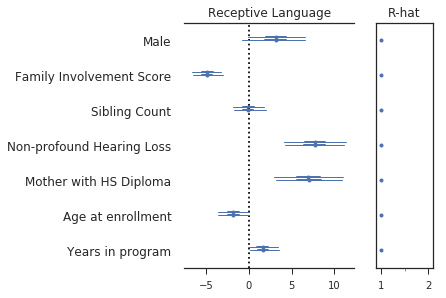

In [48]:
from pymc3 import forestplot

forestplot(rec_lang_4_trace, varnames=['β'], ylabels=labels, main='Receptive Language')

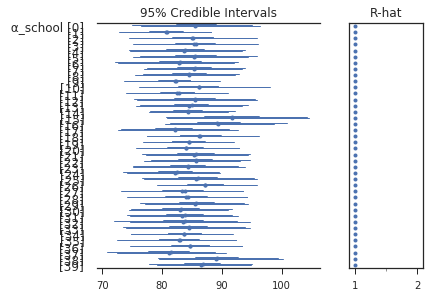

In [46]:
forestplot(rec_lang_4_trace, varnames=['α_school'])

In [49]:
from pymc3 import effective_n

effective_n(rec_lang_4_trace)

{'p_family_inv': array([3011.67738544, 3086.81624918, 2254.38980948, 2797.24719341,
        4418.1562325 ]),
 'p_hl': 3719.6984444582754,
 'p_mother_hs': 2600.928190716678,
 'p_sib': array([5658.51029847, 4930.01758789, 4663.49463712, 4918.67591676,
        2524.51806582]),
 'predictions': array([4891.38123424, 3113.762073  , 3096.64381161, 4449.79645816]),
 'x_family_inv_missing': array([1058.32285242, 1139.49789684,  895.73745764, 1715.78679369,
        1773.14683192,  553.21054032, 1482.13730747, 1285.83008168,
        1092.30673503, 1012.33313871, 1104.44199648, 1117.08762795,
        1710.6548265 , 2219.65946814,  690.23240813, 1791.63317188,
        2423.33705148, 1344.58758558, 1551.15810209, 1401.2915211 ,
        1104.2941009 ,  503.11012605,  859.215694  , 1712.94154797,
         877.36442448, 1998.03445606, 1768.0803485 ,  781.01150305,
         587.79575137, 1304.23078506,  632.67252055, 1920.57535345,
        1195.78066547,  963.55079198, 1515.91071145, 1234.22558088,
    

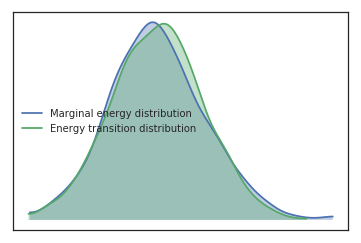

In [50]:
from pymc3 import energyplot

energyplot(rec_lang_4_trace)

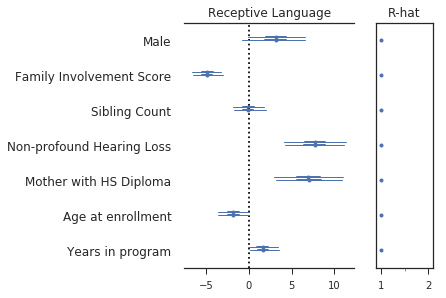

In [51]:
forestplot(rec_lang_4_trace, varnames=['β'], ylabels=labels, main='Receptive Language')

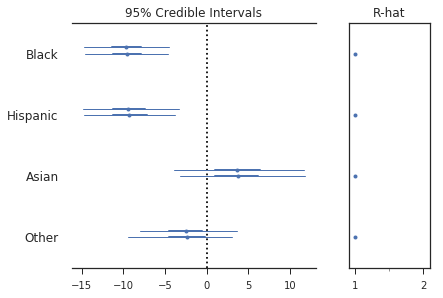

In [52]:
forestplot(rec_lang_4_trace, varnames=['β_race'], ylabels=['Black', 'Hispanic', 'Asian', 'Other'])

The school random effect standard deviation is a measure of how variable scores are among schools. The estimated standard deviation is about 4 points for this domain.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b929c9b00>,
      dtype=object)

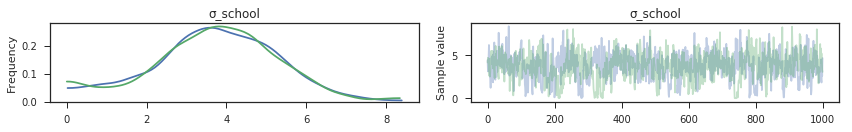

In [53]:
from pymc3 import traceplot

traceplot(rec_lang_4_trace, varnames=['σ_school'])

In [54]:
from pymc3 import summary

summary(rec_lang_4_trace, varnames=['β']).set_index(pd.Index(labels))

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Male,3.193079,1.786947,0.027351,-0.266617,6.772274,4432.146370,0.999655
Family Involvement Score,-4.882667,0.888264,0.023717,-6.675029,-3.202601,1322.368271,0.999890
Sibling Count,-0.087761,0.957757,0.017302,-1.886610,1.842826,2500.631070,0.999717
Non-profound Hearing Loss,7.748937,1.791859,0.030407,4.040261,11.137120,3103.994743,0.999530
Mother with HS Diploma,7.019129,2.038853,0.046061,3.168018,11.054606,1895.466010,0.999831
Age at enrollment,-1.852051,0.950940,0.020245,-3.644410,0.008728,1991.711429,0.999567
Years in program,1.639883,0.859951,0.020230,0.054140,3.475301,1664.006817,1.001544


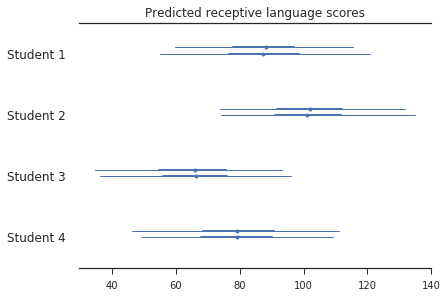

In [55]:
forestplot(rec_lang_4_trace, varnames=["predictions"], rhat=False, 
           ylabels=['Student {}'.format(i) for i in range(1,5)],
           main='Predicted receptive language scores');

## Expressive Language Model

In [56]:
expressive_language_dataset = analysis_subset[(analysis_subset.domain=='Expressive Language')]

In [57]:
expressive_language_4 = generate_model(expressive_language_dataset, 4)

In [58]:
with expressive_language_4:
    
    exp_lang_4_trace = sample(iterations, tune=tuning)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [predictions, σ, β, β_race, z_school, σ_school, μ_school, p_sib, p_mother_hs, p_hl, p_family_inv]
>CategoricalGibbsMetropolis: [x_sib_missing, x_family_inv_missing]
>BinaryGibbsMetropolis: [x_hl_missing, x_mother_hs_missing]
Sampling 2 chains: 100%|██████████| 10000/10000 [06:36<00:00, 25.24draws/s]
The number of effective samples is smaller than 25% for some parameters.


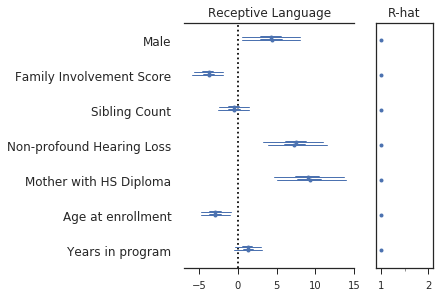

In [59]:
forestplot(exp_lang_4_trace, varnames=['β'], ylabels=labels, main='Receptive Language')

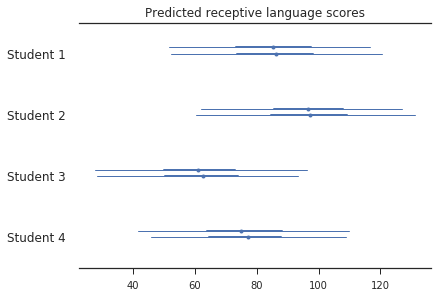

In [60]:
forestplot(exp_lang_4_trace, varnames=["predictions"], rhat=False, 
           ylabels=['Student {}'.format(i) for i in range(1,5)],
           main='Predicted receptive language scores')

## Articulation Model

In [61]:
articulation_dataset = analysis_subset[(analysis_subset.domain=='Articulation')]

In [62]:
articulation_4 = generate_model(articulation_dataset, 4)

In [63]:
with articulation_4:
    
    artic_4_trace = sample(iterations, tune=tuning)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [predictions, σ, β, β_race, z_school, σ_school, μ_school, p_sib, p_mother_hs, p_hl, p_family_inv]
>CategoricalGibbsMetropolis: [x_sib_missing, x_family_inv_missing]
>BinaryGibbsMetropolis: [x_hl_missing, x_mother_hs_missing]
Sampling 2 chains: 100%|██████████| 10000/10000 [06:13<00:00, 26.79draws/s]


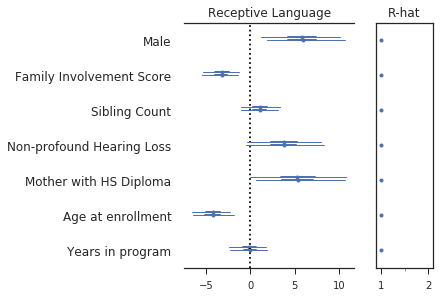

In [64]:
forestplot(artic_4_trace, varnames=['β'], ylabels=labels, main='Receptive Language')

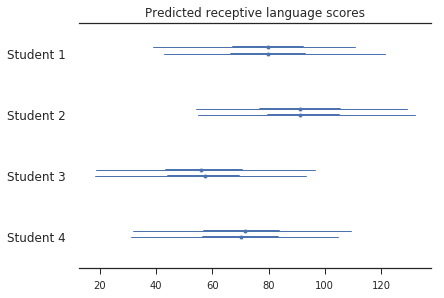

In [65]:
forestplot(artic_4_trace, varnames=["predictions"], rhat=False, 
           ylabels=['Student {}'.format(i) for i in range(1,5)],
           main='Predicted receptive language scores')

## Expressive Vocabulary Model

In [66]:
expressive_vocab_dataset = analysis_subset[(analysis_subset.domain=='Expressive Vocabulary')]

In [67]:
expressive_vocab_4 = generate_model(expressive_vocab_dataset, 4)

In [68]:
with expressive_vocab_4:
    
    expressive_vocab_4_trace = sample(iterations, tune=tuning)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [predictions, σ, β, β_race, z_school, σ_school, μ_school, p_sib, p_mother_hs, p_hl, p_family_inv]
>CategoricalGibbsMetropolis: [x_sib_missing, x_family_inv_missing]
>BinaryGibbsMetropolis: [x_hl_missing, x_mother_hs_missing]
Sampling 2 chains: 100%|██████████| 10000/10000 [06:49<00:00, 12.62draws/s]


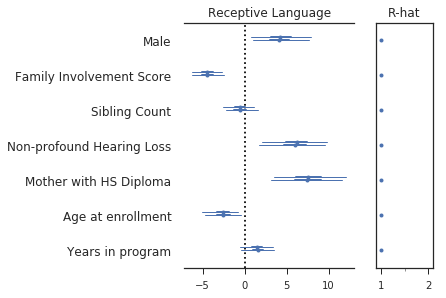

In [69]:
forestplot(expressive_vocab_4_trace, varnames=['β'], ylabels=labels, main='Receptive Language')

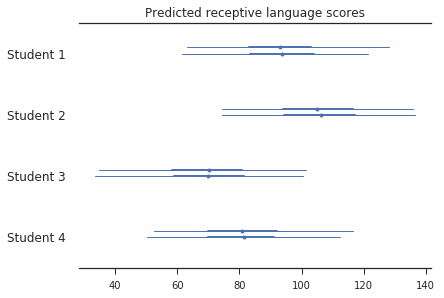

In [70]:
forestplot(expressive_vocab_4_trace, varnames=["predictions"], rhat=False, 
           ylabels=['Student {}'.format(i) for i in range(1,5)],
           main='Predicted receptive language scores')

## Receptive Vocabulary Model

In [71]:
receptive_vocab_dataset = analysis_subset[(analysis_subset.domain=='Receptive Vocabulary')]

In [72]:
receptive_vocab_4 = generate_model(receptive_vocab_dataset, 4)

In [73]:
with receptive_vocab_4:
    
    receptive_vocab_4_trace = sample(iterations, tune=tuning)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [predictions, σ, β, β_race, z_school, σ_school, μ_school, p_sib, p_mother_hs, p_hl, p_family_inv]
>CategoricalGibbsMetropolis: [x_sib_missing, x_family_inv_missing]
>BinaryGibbsMetropolis: [x_hl_missing, x_mother_hs_missing]
Sampling 2 chains: 100%|██████████| 10000/10000 [07:24<00:00, 22.50draws/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7005664825970731, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


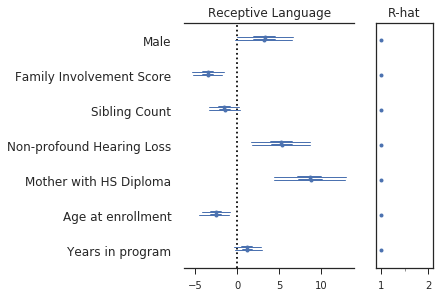

In [74]:
forestplot(receptive_vocab_4_trace, varnames=['β'], ylabels=labels, main='Receptive Language')

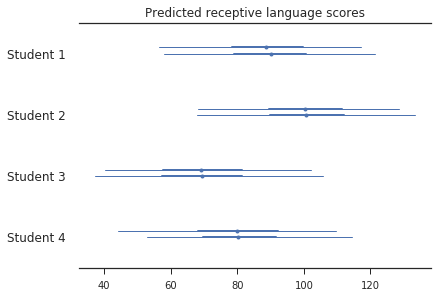

In [75]:
forestplot(receptive_vocab_4_trace, varnames=["predictions"], rhat=False, 
           ylabels=['Student {}'.format(i) for i in range(1,5)],
           main='Predicted receptive language scores')